# Лабораторная работа по машинному обучению №1

## Выполнил студент группы 15-В-1 Богатов Егор
### Вариант 3(автомобили)

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df=pd.read_csv(r'autos.csv',nrows=1000, encoding="ISO-8859-1")

In [32]:
df.shape

(1000, 20)

In [33]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [34]:
df.tail()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
995,2016-03-22 09:56:13,Fiat_Barchetta_1.8_16V,privat,Angebot,1999,test,cabrio,1996,manuell,131,andere,125000,4,benzin,fiat,nein,2016-03-22 00:00:00,0,83339,2016-03-23 17:48:06
996,2016-03-25 12:42:09,Porsche_997_GT3_MKII_EIN_SAMMLERSTÜCK_IN_VOLLA...,privat,Angebot,139997,test,coupe,2010,manuell,435,911,20000,3,benzin,porsche,nein,2016-03-25 00:00:00,0,71159,2016-04-06 13:45:07
997,2016-04-04 19:36:22,Smart_Fortwo_cabrio,privat,Angebot,3999,test,cabrio,2007,automatik,84,fortwo,150000,9,benzin,smart,nein,2016-04-04 00:00:00,0,50767,2016-04-04 19:36:22
998,2016-04-02 22:39:21,VW_pasat__1.9_tedi,privat,Angebot,2600,test,NaN,2017,automatik,101,passat,150000,4,diesel,volkswagen,NaN,2016-04-02 00:00:00,0,61197,2016-04-06 23:44:35
999,2016-03-26 13:50:33,Honda_Civic_Coupe_1.7_LS,privat,Angebot,1500,control,coupe,2001,manuell,120,civic,150000,3,benzin,honda,nein,2016-03-26 00:00:00,0,8058,2016-03-26 13:50:33


In [35]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000
mean,5755.082000,2002.76300,111.198000,125015.000000,5.951000,0.0,50072.922000
std,8648.759095,29.35552,71.143434,40629.737269,3.774234,0.0,25873.721049
min,0.000000,1111.00000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1200.000000,1999.00000,71.000000,100000.000000,3.000000,0.0,29656.250000
50%,2994.000000,2004.00000,105.000000,150000.000000,6.000000,0.0,49587.500000
75%,7500.000000,2009.00000,150.000000,150000.000000,9.000000,0.0,69683.500000
max,139997.000000,2018.00000,510.000000,150000.000000,12.000000,0.0,99974.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
dateCrawled            1000 non-null object
name                   1000 non-null object
seller                 1000 non-null object
offerType              1000 non-null object
price                  1000 non-null int64
abtest                 1000 non-null object
vehicleType            882 non-null object
yearOfRegistration     1000 non-null int64
gearbox                938 non-null object
powerPS                1000 non-null int64
model                  949 non-null object
kilometer              1000 non-null int64
monthOfRegistration    1000 non-null int64
fuelType               908 non-null object
brand                  1000 non-null object
notRepairedDamage      806 non-null object
dateCreated            1000 non-null object
nrOfPictures           1000 non-null int64
postalCode             1000 non-null int64
lastSeen               1000 non-null object
dtypes: int64(7), object(1

In [37]:
df_reduced=df.dropna()
df_reduced=df_reduced.drop_duplicates()
df_reduced=df_reduced.reset_index(drop=True)

In [38]:
df_reduced.shape

(693, 20)

In [39]:
df_reduced.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
1,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
2,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
3,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
4,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58


In [40]:
df_reduced.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,693.000000,693.000000,693.000000,693.000000,693.000000,693.0,693.000000
mean,6872.880231,2003.261183,126.388167,124963.924964,6.437229,0.0,50674.057720
std,9721.018636,6.631041,66.660847,39102.542274,3.437829,0.0,26342.977878
min,0.000000,1959.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1690.000000,1999.000000,80.000000,100000.000000,4.000000,0.0,30179.000000
50%,3800.000000,2004.000000,116.000000,150000.000000,6.000000,0.0,50859.000000
75%,8700.000000,2008.000000,160.000000,150000.000000,10.000000,0.0,71134.000000
max,139997.000000,2015.000000,510.000000,150000.000000,12.000000,0.0,99974.000000


In [41]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 20 columns):
dateCrawled            693 non-null object
name                   693 non-null object
seller                 693 non-null object
offerType              693 non-null object
price                  693 non-null int64
abtest                 693 non-null object
vehicleType            693 non-null object
yearOfRegistration     693 non-null int64
gearbox                693 non-null object
powerPS                693 non-null int64
model                  693 non-null object
kilometer              693 non-null int64
monthOfRegistration    693 non-null int64
fuelType               693 non-null object
brand                  693 non-null object
notRepairedDamage      693 non-null object
dateCreated            693 non-null object
nrOfPictures           693 non-null int64
postalCode             693 non-null int64
lastSeen               693 non-null object
dtypes: int64(7), object(13)
memory usage:

### 1.Удалите столбцы, ценность которых для оценки автомобилей низка.

In [42]:
df_reduced.drop(df_reduced.columns[[2,3,5,6]], axis=1)

,dateCrawled,name,price,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
1,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
2,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
3,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,2200,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
4,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,0,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
5,2016-03-26 19:54:18,Mazda_3_1.6_Sport,2000,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein,2016-03-26 00:00:00,0,96224,2016-04-06 10:45:34
6,2016-04-07 10:06:22,Volkswagen_Passat_Variant_2.0_TDI_Comfortline,2799,2005,manuell,140,passat,150000,12,diesel,volkswagen,ja,2016-04-07 00:00:00,0,57290,2016-04-07 10:25:17
7,2016-03-21 12:57:01,Nissan_Navara_2.5DPF_SE4x4_Klima_Sitzheizg_Blu...,17999,2011,manuell,190,navara,70000,3,diesel,nissan,nein,2016-03-21 00:00:00,0,4177,2016-04-06 07:45:42
8,2016-03-20 10:25:19,Renault_Twingo_1.2_16V_Aut.,1750,2004,automatik,75,twingo,150000,2,benzin,renault,nein,2016-03-20 00:00:00,0,65599,2016-04-06 13:16:07
9,2016-03-23 15:48:05,Ford_C_MAX_2.0_TDCi_DPF_Titanium,7550,2007,manuell,136,c_max,150000,6,diesel,ford,nein,2016-03-23 00:00:00,0,88361,2016-04-05 18:45:11


### 2. Удалите повторяющиеся строки, строки содержащие пропуски в данных

#### Сделано чуть выше в пункте In[8]

### 3. Удалите данные в столбцах, выходящие за некоторые пределы(год регистрации, цена, мощность двигателя)

In [43]:
df_reduced.drop(df_reduced.columns[[1,4,7,9,10,14]],axis=1)

,dateCrawled,seller,offerType,abtest,vehicleType,gearbox,kilometer,monthOfRegistration,fuelType,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-17 16:54:04,privat,Angebot,test,kleinwagen,manuell,150000,6,benzin,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
1,2016-03-31 17:25:20,privat,Angebot,test,kleinwagen,manuell,90000,7,diesel,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
2,2016-04-04 17:36:23,privat,Angebot,test,limousine,manuell,150000,10,benzin,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
3,2016-04-01 20:48:51,privat,Angebot,test,cabrio,manuell,150000,8,benzin,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
4,2016-03-21 18:54:38,privat,Angebot,test,limousine,manuell,40000,7,benzin,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
5,2016-03-26 19:54:18,privat,Angebot,control,limousine,manuell,150000,12,benzin,nein,2016-03-26 00:00:00,0,96224,2016-04-06 10:45:34
6,2016-04-07 10:06:22,privat,Angebot,control,kombi,manuell,150000,12,diesel,ja,2016-04-07 00:00:00,0,57290,2016-04-07 10:25:17
7,2016-03-21 12:57:01,privat,Angebot,control,suv,manuell,70000,3,diesel,nein,2016-03-21 00:00:00,0,4177,2016-04-06 07:45:42
8,2016-03-20 10:25:19,privat,Angebot,control,kleinwagen,automatik,150000,2,benzin,nein,2016-03-20 00:00:00,0,65599,2016-04-06 13:16:07
9,2016-03-23 15:48:05,privat,Angebot,test,bus,manuell,150000,6,diesel,nein,2016-03-23 00:00:00,0,88361,2016-04-05 18:45:11


## 4.Заполнить пропущенные данные в строковых полях

In [44]:
df.shape

(1000, 20)

In [45]:
df.count()

dateCrawled            1000
name                   1000
seller                 1000
offerType              1000
price                  1000
abtest                 1000
vehicleType             882
yearOfRegistration     1000
gearbox                 938
powerPS                1000
model                   949
kilometer              1000
monthOfRegistration    1000
fuelType                908
brand                  1000
notRepairedDamage       806
dateCreated            1000
nrOfPictures           1000
postalCode             1000
lastSeen               1000
dtype: int64

In [46]:
df_reduced['vehicleType']= df_reduced['vehicleType'].fillna(df_reduced['vehicleType'])
df_reduced['gearbox']= df_reduced['gearbox'].fillna(df_reduced['gearbox'])
df_reduced['model']= df_reduced['model'].fillna(df_reduced['model'])
df_reduced['fuelType']= df_reduced['fuelType'].fillna(df_reduced['fuelType'])
df_reduced['notRepairedDamage']= df_reduced['notRepairedDamage'].fillna(df_reduced['notRepairedDamage'])
df_reduced=df_reduced.dropna().reset_index(drop=True)
df_reduced.count()


dateCrawled            693
name                   693
seller                 693
offerType              693
price                  693
abtest                 693
vehicleType            693
yearOfRegistration     693
gearbox                693
powerPS                693
model                  693
kilometer              693
monthOfRegistration    693
fuelType               693
brand                  693
notRepairedDamage      693
dateCreated            693
nrOfPictures           693
postalCode             693
lastSeen               693
dtype: int64

In [47]:
df_reduced.shape

(693, 20)

## 5. Построить гистограмму для типов коробок передач

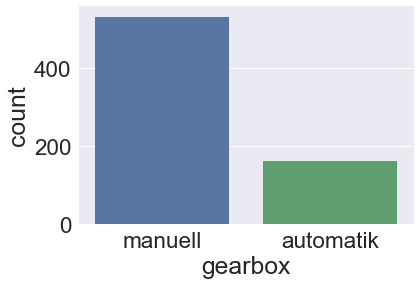

In [48]:
sns.countplot(data=df_reduced, x='gearbox')
plt.show()

## 6. Построить гистограмму по маркам автомобилей


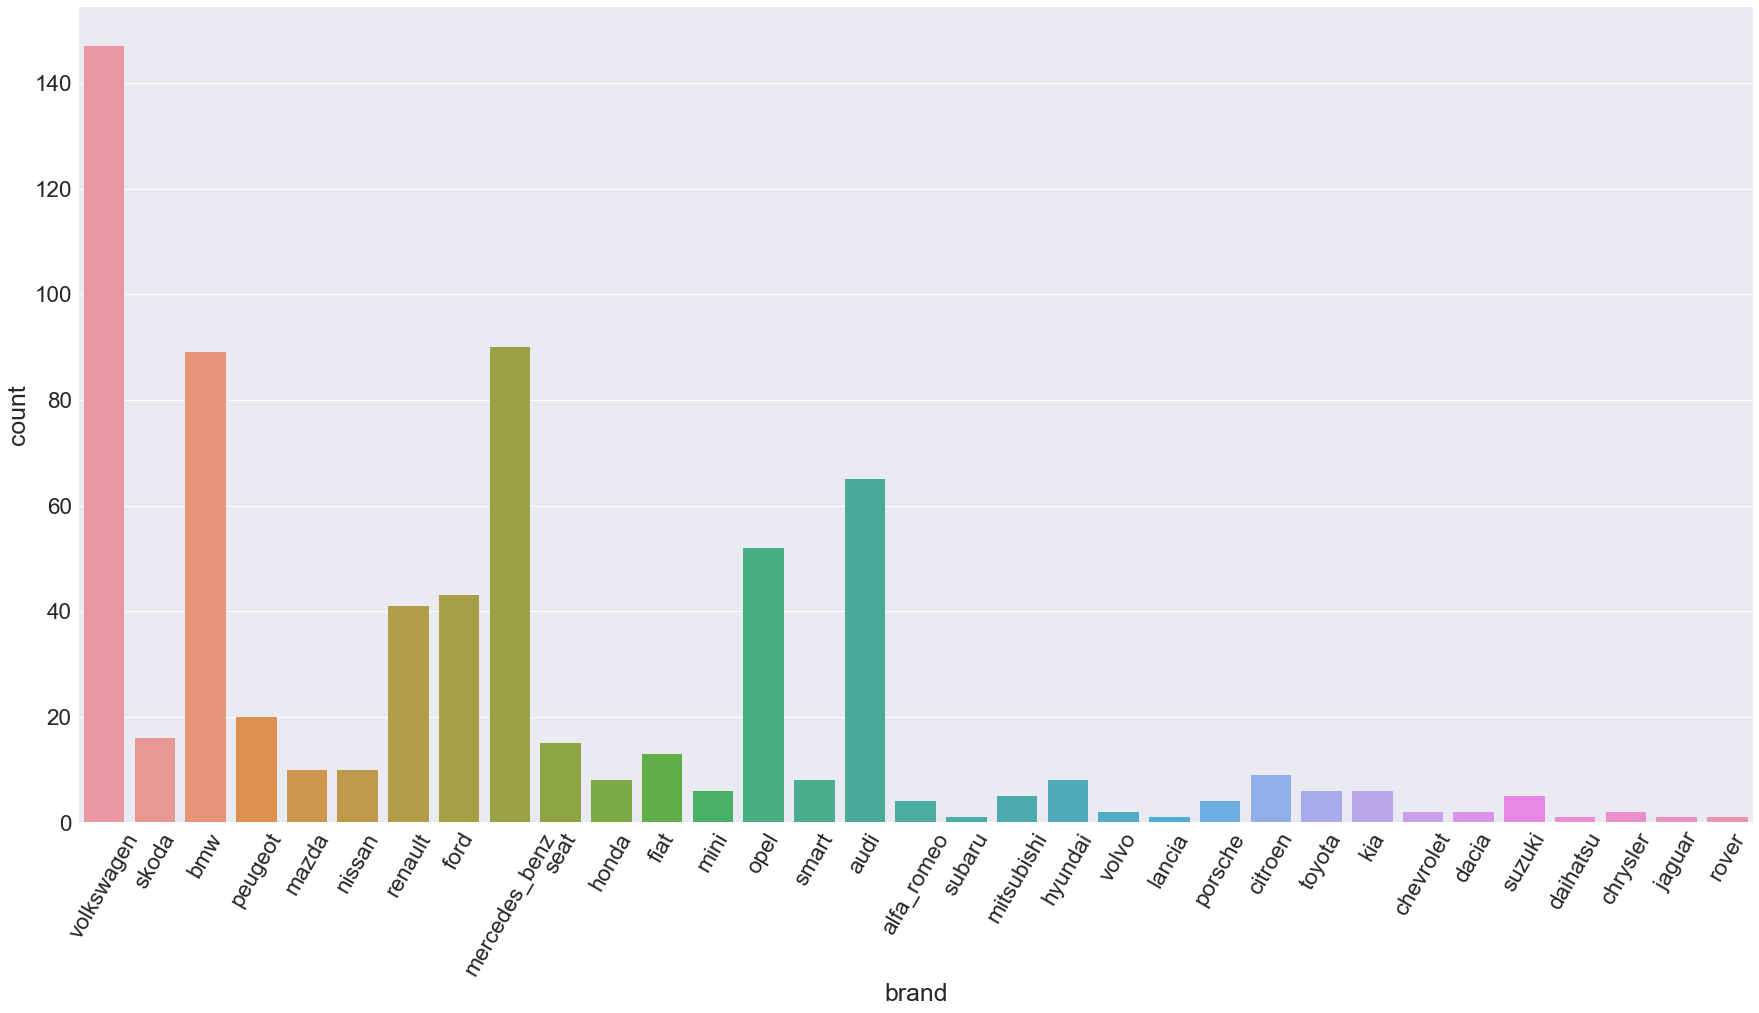

In [49]:
plt.figure(figsize=(30,15))
sns.set(font_scale=2.25)
g = sns.countplot(data=df_reduced, x='brand')
g.set_xticklabels(g.get_xticklabels(), rotation=60)
plt.show()

## 7.Постройте гистограмму по типам кузова

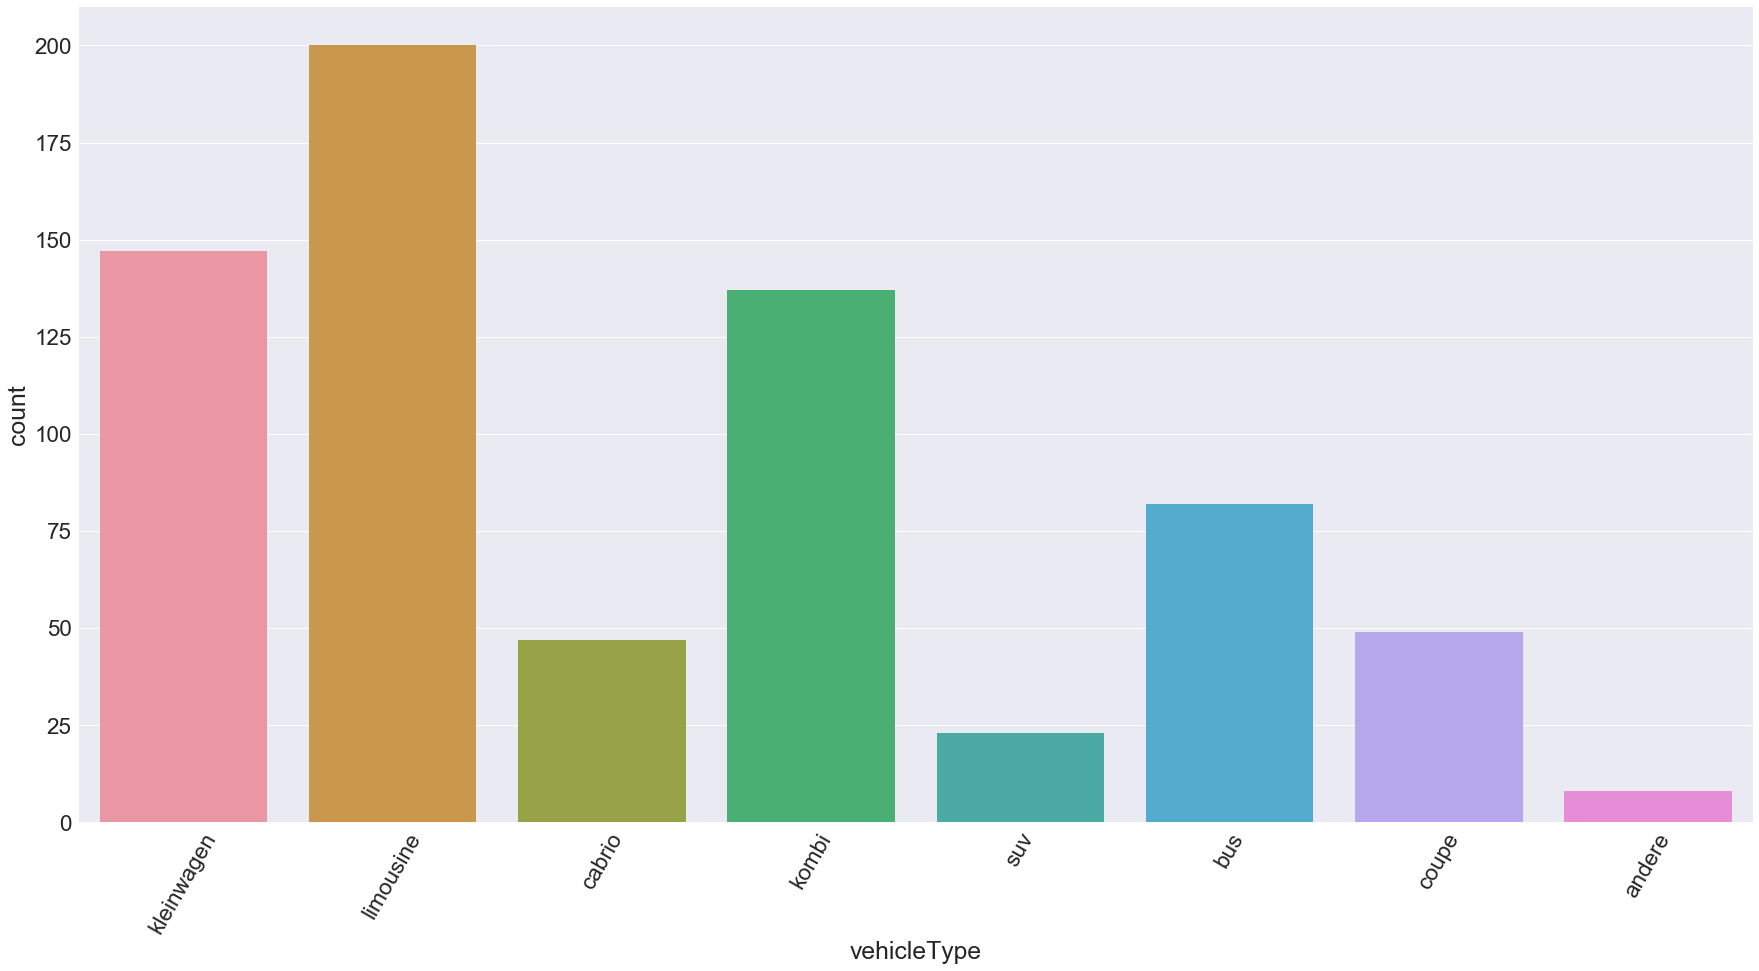

In [50]:
plt.figure(figsize=(30,15))
sns.set(font_scale=2.25)
g = sns.countplot(data=df_reduced, x='vehicleType')
g.set_xticklabels(g.get_xticklabels(), rotation=60)
plt.show()

## 8. Постройте гистограмму по используемому топливу.

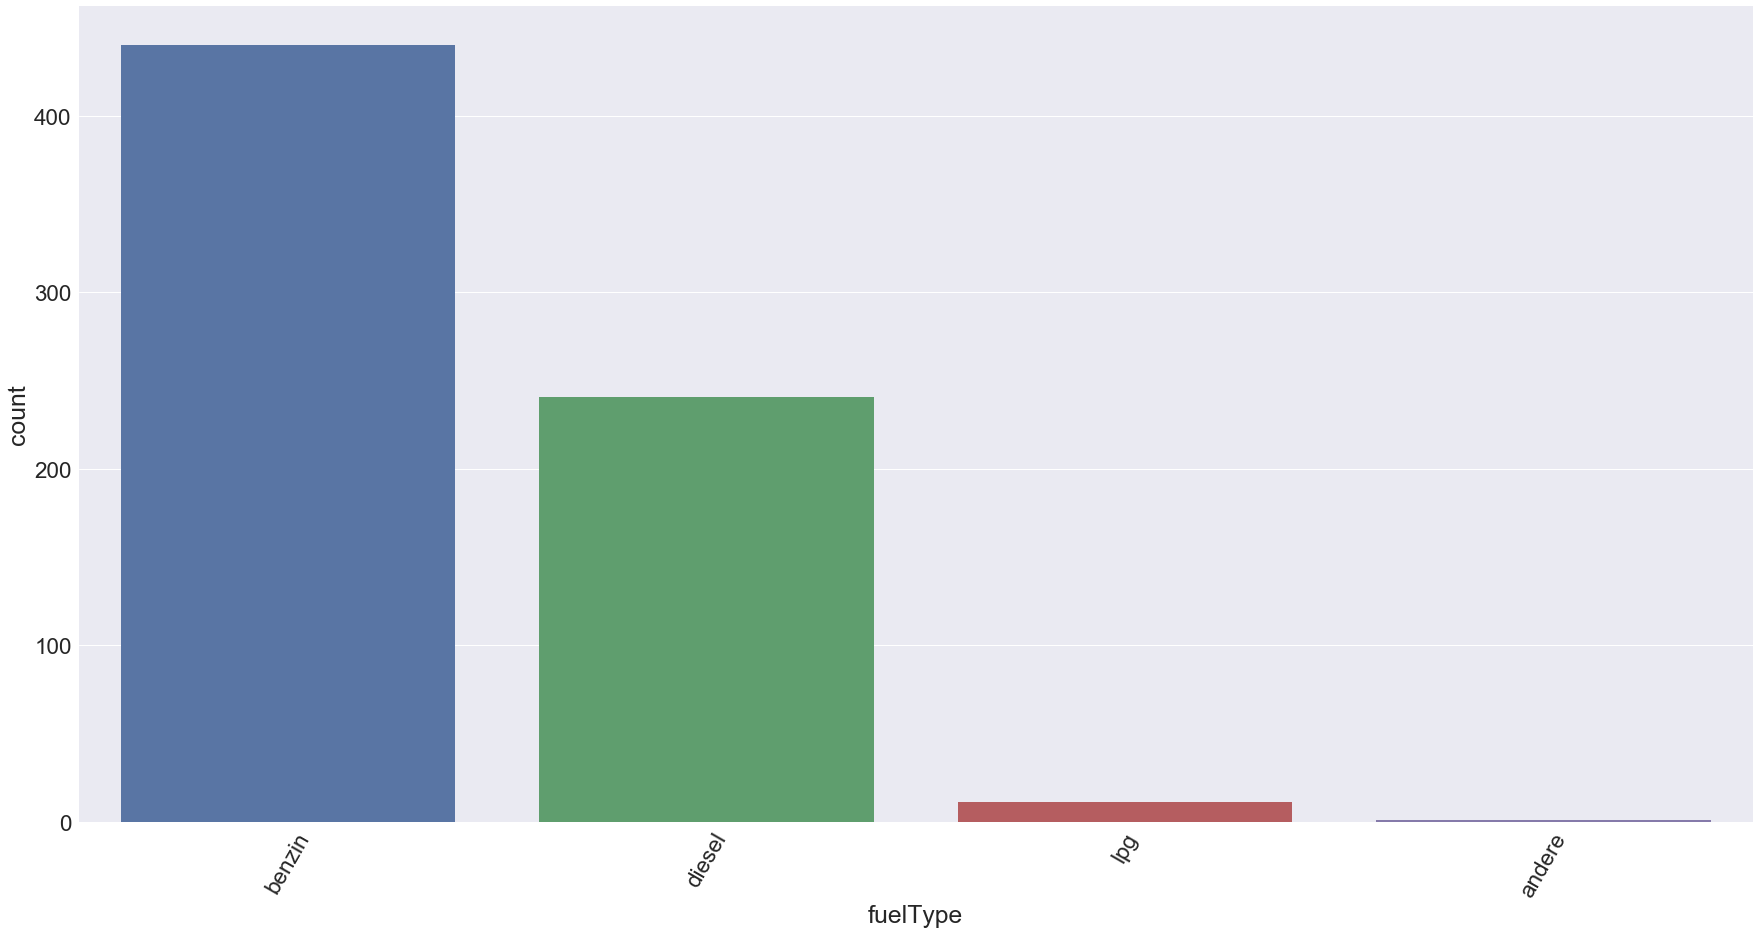

In [51]:
plt.figure(figsize=(30,15))
sns.set(font_scale=2.25)
g = sns.countplot(data=df_reduced, x='fuelType')
g.set_xticklabels(g.get_xticklabels(), rotation=60)
plt.show()

## 9. Добавьте в данные новый признак, который представляет собой длину названия автомобиля.

In [52]:
len_names = []
for i in range(len(df_reduced)):
    len_names.append(len(df_reduced['name'][i]))
    
df_names = pd.DataFrame({'name lenght':len_names})
df_new = pd.concat([df_reduced, df_names], axis=1)
df_new.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,name lenght
0,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,...,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17,18
1,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,...,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21,30
2,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,...,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07,50
3,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,...,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39,27
4,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,...,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58,28


## 10. Постройте карту корреляций между признаками.

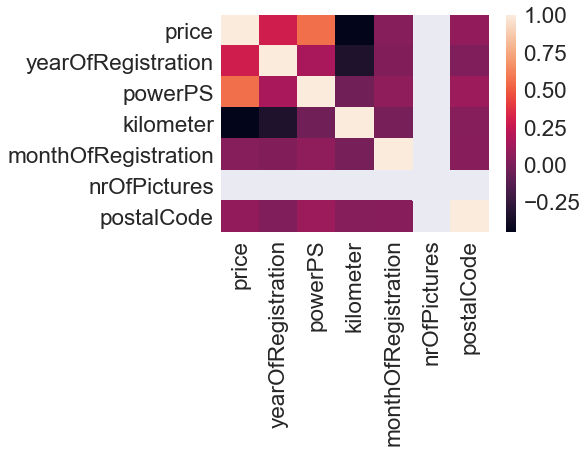

In [53]:
categorial_columns = [i for i in df_reduced.columns if df_reduced[i].dtype.name == 'object']
df_corr = df_reduced.drop(categorial_columns, axis=1).corr()
sns.heatmap(df_corr)
plt.show()